In [4]:

## Estimated County-Level Prevalence of Selected Underlying Medical Conditions Associated with Increased Risk for Severe COVID-19 Illness — United States, 2018


Underlying medical conditions important in COVID, as explored in https://www.cdc.gov/mmwr/volumes/69/wr/mm6929a1.htm?s_cid=mm6929a1_w

Older adults and those with chronic obstructive pulmonary disease, heart disease, diabetes, chronic kidney disease, and obesity are at higher risk for severe COVID-19–associated illness.
The median model-based estimate of the prevalence of any of five underlying medical conditions associated with increased risk for severe COVID-19–associated illness among U.S. adults was 47.2% among 3,142 U.S. counties. The estimated number of persons with these conditions followed population distributions, but prevalence was higher in more rural counties.

The findings can help local decision-makers identify areas at higher risk for severe COVID-19 illness in their jurisdictions and guide resource allocation and implementation of community mitigation strategies.


data source: https://stacks.cdc.gov/view/cdc/90519
There are no missing fields per county. 

        
glossary: 
COPD	Chronic obstructive pulmonary disorder
CKD	Chronic kidney disease
STAB	?state abbreviation? - uncertain
CI	Confidence interval

Urban_rural_code https://www.cdc.gov/nchs/data_access/urban_rural.htm

data:

COUNTY_NAME
STATE_NAME
STATE_FIPS
CNTY_FIPS
FIPS
county_pop2018_18 and older
anycondition_prevalence
anycondition_Lower 95% CI
anycondition_Upper 95% CI
anycondition_number
Obesity_prevalence
Obesity_Lower 95% CI
Obesity_Upper 95% CI
Obesity_number
Heart disease_prevalence
Heart disease_Lower 95% CI
Heart disease_Upper 95% CI
Heart disease_number
COPD_prevalence
COPD_Lower 95% CI
COPD_Upper 95% CI
COPD_number
diabetes_prevalence
diabetes_Lower 95% CI
diabetes_Upper 95% CI
diabetes_number
CKD_prevalence
CKD_Lower 95% CI
CKD_Upper 95% CI
CKD_number
Urban_rural_code 
STAB

In [4]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()

In [5]:
health=pd.read_csv('CDC_underlyingconditions/cdc_90519_DS1.csv', delimiter=',')

print(health.shape)


(3142, 32)


In [6]:
pd.options.display.max_columns = 100
health.head(3)

COUNTY_NAME STATE_NAME  STATE_FIPS  CNTY_FIPS  FIPS  \
0     Autauga    Alabama           1          1  1001   
1     Baldwin    Alabama           1          3  1003   
2     Barbour    Alabama           1          5  1005   

   county_pop2018_18 and older  anycondition_prevalence  \
0                        42438                     47.6   
1                       170912                     40.2   
2                        19689                     57.5   

   anycondition_Lower 95% CI  anycondition_Upper 95% CI  anycondition_number  \
0                       45.4                       49.4                20181   
1                       38.2                       42.3                68790   
2                       55.6                       59.1                11325   

   Obesity_prevalence  Obesity_Lower 95% CI  Obesity_Upper 95% CI  \
0                35.8                  34.2                  37.3   
1                29.7                  28.4                  31.0   
2                40.7                  39.5                  41.9   

   Obesity_number  Heart disease_prevalence  Heart disease_Lower 95% CI  \
0           15193                       7.9                         7.2   
1           50761                       7.8                         7.0   
2            8013                      11.0                        10.1   

   Heart disease_Upper 95% CI  Heart disease_number  COPD_prevalence  \
0                         8.7                  3345              8.6   
1                         8.7                 13414              8.6   
2                        11.8                  2159             12.1   

   COPD_Lower 95% CI  COPD_Upper 95% CI  COPD_number  diabetes_prevalence  \
0                7.3                9.9         3644                 12.9   
1                7.2               10.1        14692                 12.0   
2               10.7               13.3         2373                 19.7   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   

   Urban_rural_code STAB  
0                 3   AL  
1                 4   AL  
2                 6   AL

In [9]:
health[['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']].describe()

anycondition_prevalence  Obesity_prevalence  Heart disease_prevalence  \
count              3142.000000         3142.000000               3142.000000   
mean                 46.790070           35.016232                  8.606365   
std                   6.379469            4.517515                  1.758950   
min                  22.000000           15.200000                  3.500000   
25%                  42.900000           32.400000                  7.400000   
50%                  47.200000           35.400000                  8.600000   
75%                  51.000000           37.900000                  9.800000   
max                  66.200000           49.900000                 15.100000   

       COPD_prevalence  diabetes_prevalence  CKD_prevalence  
count      3142.000000          3142.000000     3142.000000  
mean          9.093316            13.072502        3.445799  
std           2.345458             2.724288        0.568151  
min           3.500000             6.100000        1.800000  
25%           7.300000            11.200000        3.100000  
50%           8.900000            12.800000        3.400000  
75%          10.600000            14.800000        3.800000  
max          19.900000            25.600000        6.200000

In [38]:
health.isna().sum()

COUNTY_NAME                    0
STATE_NAME                     0
STATE_FIPS                     0
CNTY_FIPS                      0
FIPS                           0
county_pop2018_18 and older    0
anycondition_prevalence        0
anycondition_Lower 95% CI      0
anycondition_Upper 95% CI      0
anycondition_number            0
Obesity_prevalence             0
Obesity_Lower 95% CI           0
Obesity_Upper 95% CI           0
Obesity_number                 0
Heart disease_prevalence       0
Heart disease_Lower 95% CI     0
Heart disease_Upper 95% CI     0
Heart disease_number           0
COPD_prevalence                0
COPD_Lower 95% CI              0
COPD_Upper 95% CI              0
COPD_number                    0
diabetes_prevalence            0
diabetes_Lower 95% CI          0
diabetes_Upper 95% CI          0
diabetes_number                0
CKD_prevalence                 0
CKD_Lower 95% CI               0
CKD_Upper 95% CI               0
CKD_number                     0
Urban_rura

In [16]:
health[['anycondition_prevalence']].describe

<bound method NDFrame.describe of       anycondition_prevalence
0                        47.6
1                        40.2
2                        57.5
3                        51.6
4                        46.3
...                       ...
3137                     40.3
3138                     24.3
3139                     42.2
3140                     37.5
3141                     46.0

[3142 rows x 1 columns]>

In [8]:
health[['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']].mean()

anycondition_prevalence     46.790070
Obesity_prevalence          35.016232
Heart disease_prevalence     8.606365
COPD_prevalence              9.093316
diabetes_prevalence         13.072502
CKD_prevalence               3.445799
dtype: float64

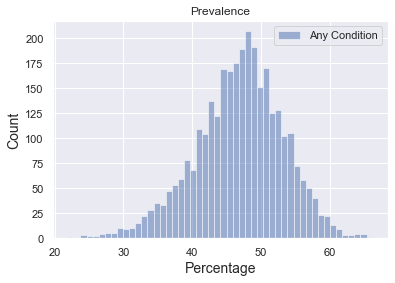

In [28]:
plt.figure
plt.hist(health['anycondition_prevalence'], bins=50, alpha=0.5, label="Any Condition")
plt.xlabel("Percentage", size=14)
plt.ylabel("Count", size=14)
plt.title("Prevalence")
plt.legend(loc='upper right')

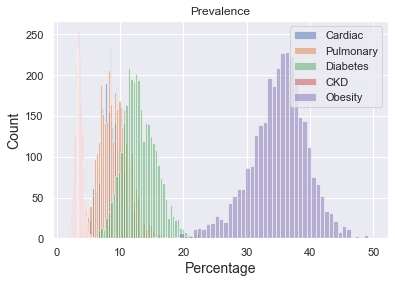

In [6]:
plt.figure

plt.hist(health['Heart disease_prevalence'], bins=50, alpha=0.5, label="Cardiac")
plt.hist(health['COPD_prevalence'], bins=50, alpha=0.5, label="Pulmonary")
plt.hist(health['diabetes_prevalence'], bins=50, alpha=0.5, label="Diabetes")
plt.hist(health['CKD_prevalence'], bins=50, alpha=0.5, label="CKD")
plt.hist(health['Obesity_prevalence'], bins=50, alpha=0.5, label="Obesity")

plt.xlabel("Percentage", size=14)
plt.ylabel("Count", size=14)
plt.title("Prevalence")
plt.legend(loc='upper right')

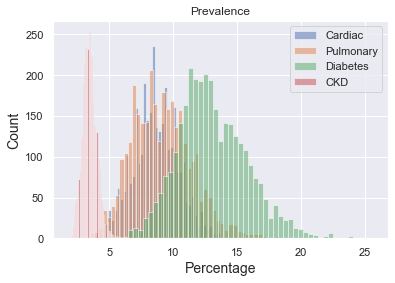

In [37]:
plt.figure
plt.hist(health['Heart disease_prevalence'], bins=50, alpha=0.5, label="Cardiac")
plt.hist(health['COPD_prevalence'], bins=50, alpha=0.5, label="Pulmonary")
plt.hist(health['diabetes_prevalence'], bins=50, alpha=0.5, label="Diabetes")
plt.hist(health['CKD_prevalence'], bins=50, alpha=0.5, label="CKD")

plt.xlabel("Percentage", size=14)
plt.ylabel("Count", size=14)
plt.title("Prevalence")
plt.legend(loc='upper right')

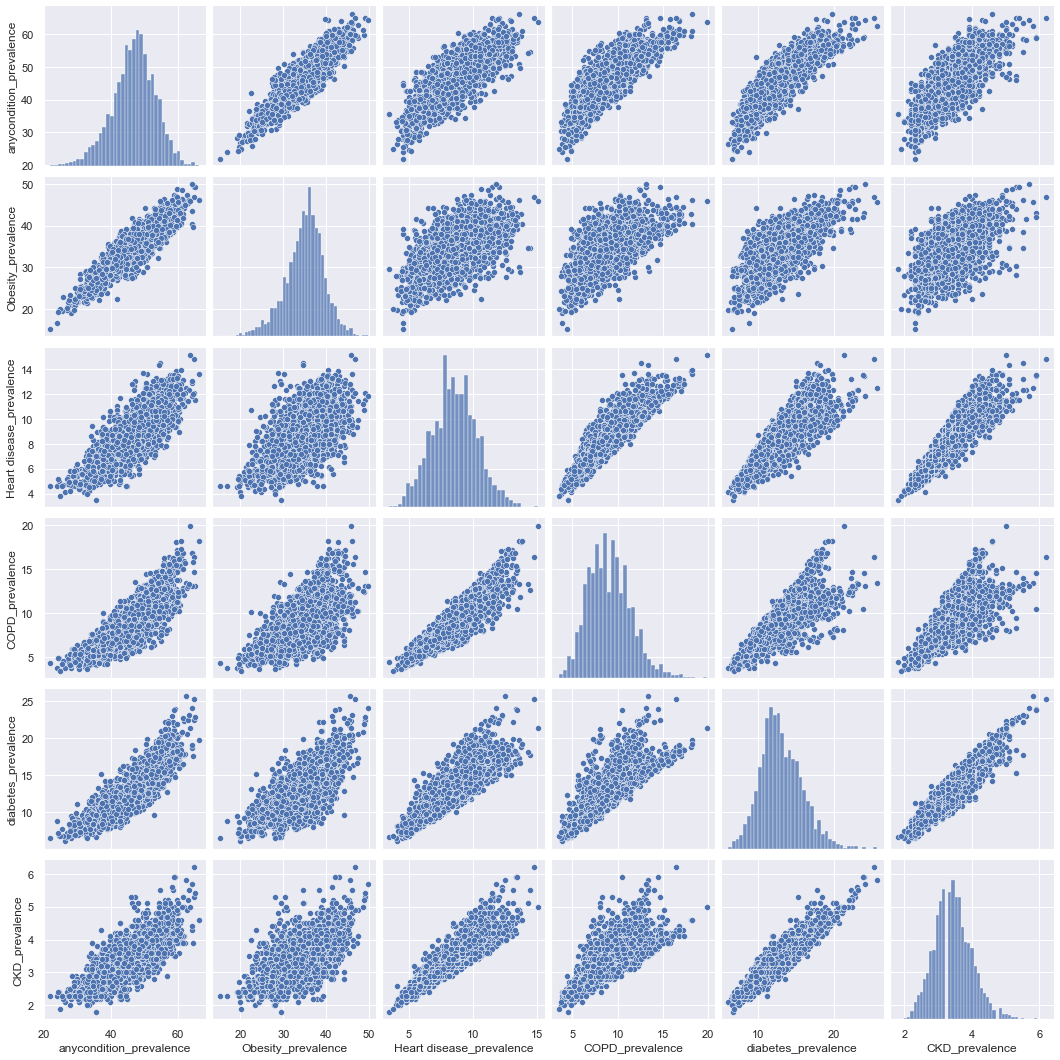

In [8]:
sns.pairplot(health[['anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']])

In [9]:
health[['CNTY_FIPS', 'anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']].corr()

CNTY_FIPS  anycondition_prevalence  \
CNTY_FIPS                  1.000000                 0.115125   
anycondition_prevalence    0.115125                 1.000000   
Obesity_prevalence         0.138206                 0.894510   
Heart disease_prevalence   0.004223                 0.784204   
COPD_prevalence            0.001810                 0.810818   
diabetes_prevalence        0.115850                 0.849877   
CKD_prevalence             0.047072                 0.734680   

                          Obesity_prevalence  Heart disease_prevalence  \
CNTY_FIPS                           0.138206                  0.004223   
anycondition_prevalence             0.894510                  0.784204   
Obesity_prevalence                  1.000000                  0.559631   
Heart disease_prevalence            0.559631                  1.000000   
COPD_prevalence                     0.589673                  0.886839   
diabetes_prevalence                 0.699103                  0.830798   
CKD_prevalence                      0.555159                  0.892894   

                          COPD_prevalence  diabetes_prevalence  CKD_prevalence  
CNTY_FIPS                        0.001810             0.115850        0.047072  
anycondition_prevalence          0.810818             0.849877        0.734680  
Obesity_prevalence               0.589673             0.699103        0.555159  
Heart disease_prevalence         0.886839             0.830798        0.892894  
COPD_prevalence                  1.000000             0.788780        0.736805  
diabetes_prevalence              0.788780             1.000000        0.918295  
CKD_prevalence                   0.736805             0.918295        1.000000

In [11]:
## relationships by County with vaccinations

In [13]:
vcc=pd.read_csv('/Users/Tanya/GitHub/DS4A_team27/data/clean/covid19_current_draft_data.csv')

In [13]:
vcc.shape

(3137, 86)

In [15]:
pd.options.display.max_columns = 100
vcc.head(5)

fips    state          county state_abb  popfull_per  pop_full_12plus_per  \
0  1001  Alabama  Autauga County        AL         34.0                 39.9   
1  1003  Alabama  Baldwin County        AL         42.7                 49.5   
2  1005  Alabama  Barbour County        AL         35.7                 41.1   
3  1007  Alabama     Bibb County        AL         29.7                 34.2   
4  1009  Alabama   Blount County        AL         26.4                 31.0   

   pop_full_18plus_per  pop_full_65plus_per  pop_first_per  \
0                 41.8                 61.7           43.1   
1                 51.9                 75.3           54.4   
2                 43.0                 66.1           46.6   
3                 35.7                 57.0           37.3   
4                 32.9                 49.5           32.8   

   pop_first_12plus_per  pop_first_18plus_per  pop_first_65plus_per  cases_no  \
0                  50.6                  52.6                  74.5    9780.0   
1                  63.0                  65.7                  91.1   36579.0   
2                  53.8                  56.0                  76.3    3519.0   
3                  42.8                  44.7                  64.5    4157.0   
4                  38.5                  40.6                  57.3    9870.0   

   death_no  pop_census  cases_prop  death_prop  Estimated hesitant  \
0     142.0     55869.0   17.505235    0.254166              0.1685   
1     518.0    223234.0   16.385945    0.232044              0.1544   
2      71.0     24686.0   14.255043    0.287612              0.1676   
3      83.0     22394.0   18.563008    0.370635              0.1808   
4     162.0     57826.0   17.068447    0.280151              0.1854   

   Estimated hesitant or unsure  Estimated strongly hesitant  \
0                        0.2233                       0.1272   
1                        0.1988                       0.1169   
2                        0.2337                       0.1274   
3                        0.2526                       0.1390   
4                        0.2362                       0.1416   

   Social Vulnerability Index (SVI)             SVI Category  \
0                              0.44   Moderate Vulnerability   
1                              0.22        Low Vulnerability   
2                              1.00  Very High Vulnerability   
3                              0.60       High Vulnerability   
4                              0.42   Moderate Vulnerability   

   CVAC level of concern for vaccination rollout CVAC Level Of Concern  \
0                                           0.61          High Concern   
1                                           0.23           Low Concern   
2                                           0.89     Very High Concern   
3                                           0.76          High Concern   
4                                           0.80          High Concern   

   Percent Hispanic  Percent non-Hispanic American Indian/Alaska Native  \
0            0.0283                                             0.0025    
1            0.0456                                             0.0065    
2            0.0436                                             0.0029    
3            0.0257                                             0.0013    
4            0.0926                                             0.0007    

   Percent non-Hispanic Asian  Percent non-Hispanic Black  \
0                      0.0103                      0.1900   
1                      0.0092                      0.0917   
2                      0.0048                      0.4744   
3                      0.0012                      0.2214   
4                      0.0037                      0.0153   

   Percent non-Hispanic Native Hawaiian/Pacific Islander  \
0                                             0.0001       
1                                             0.0000       
2                     

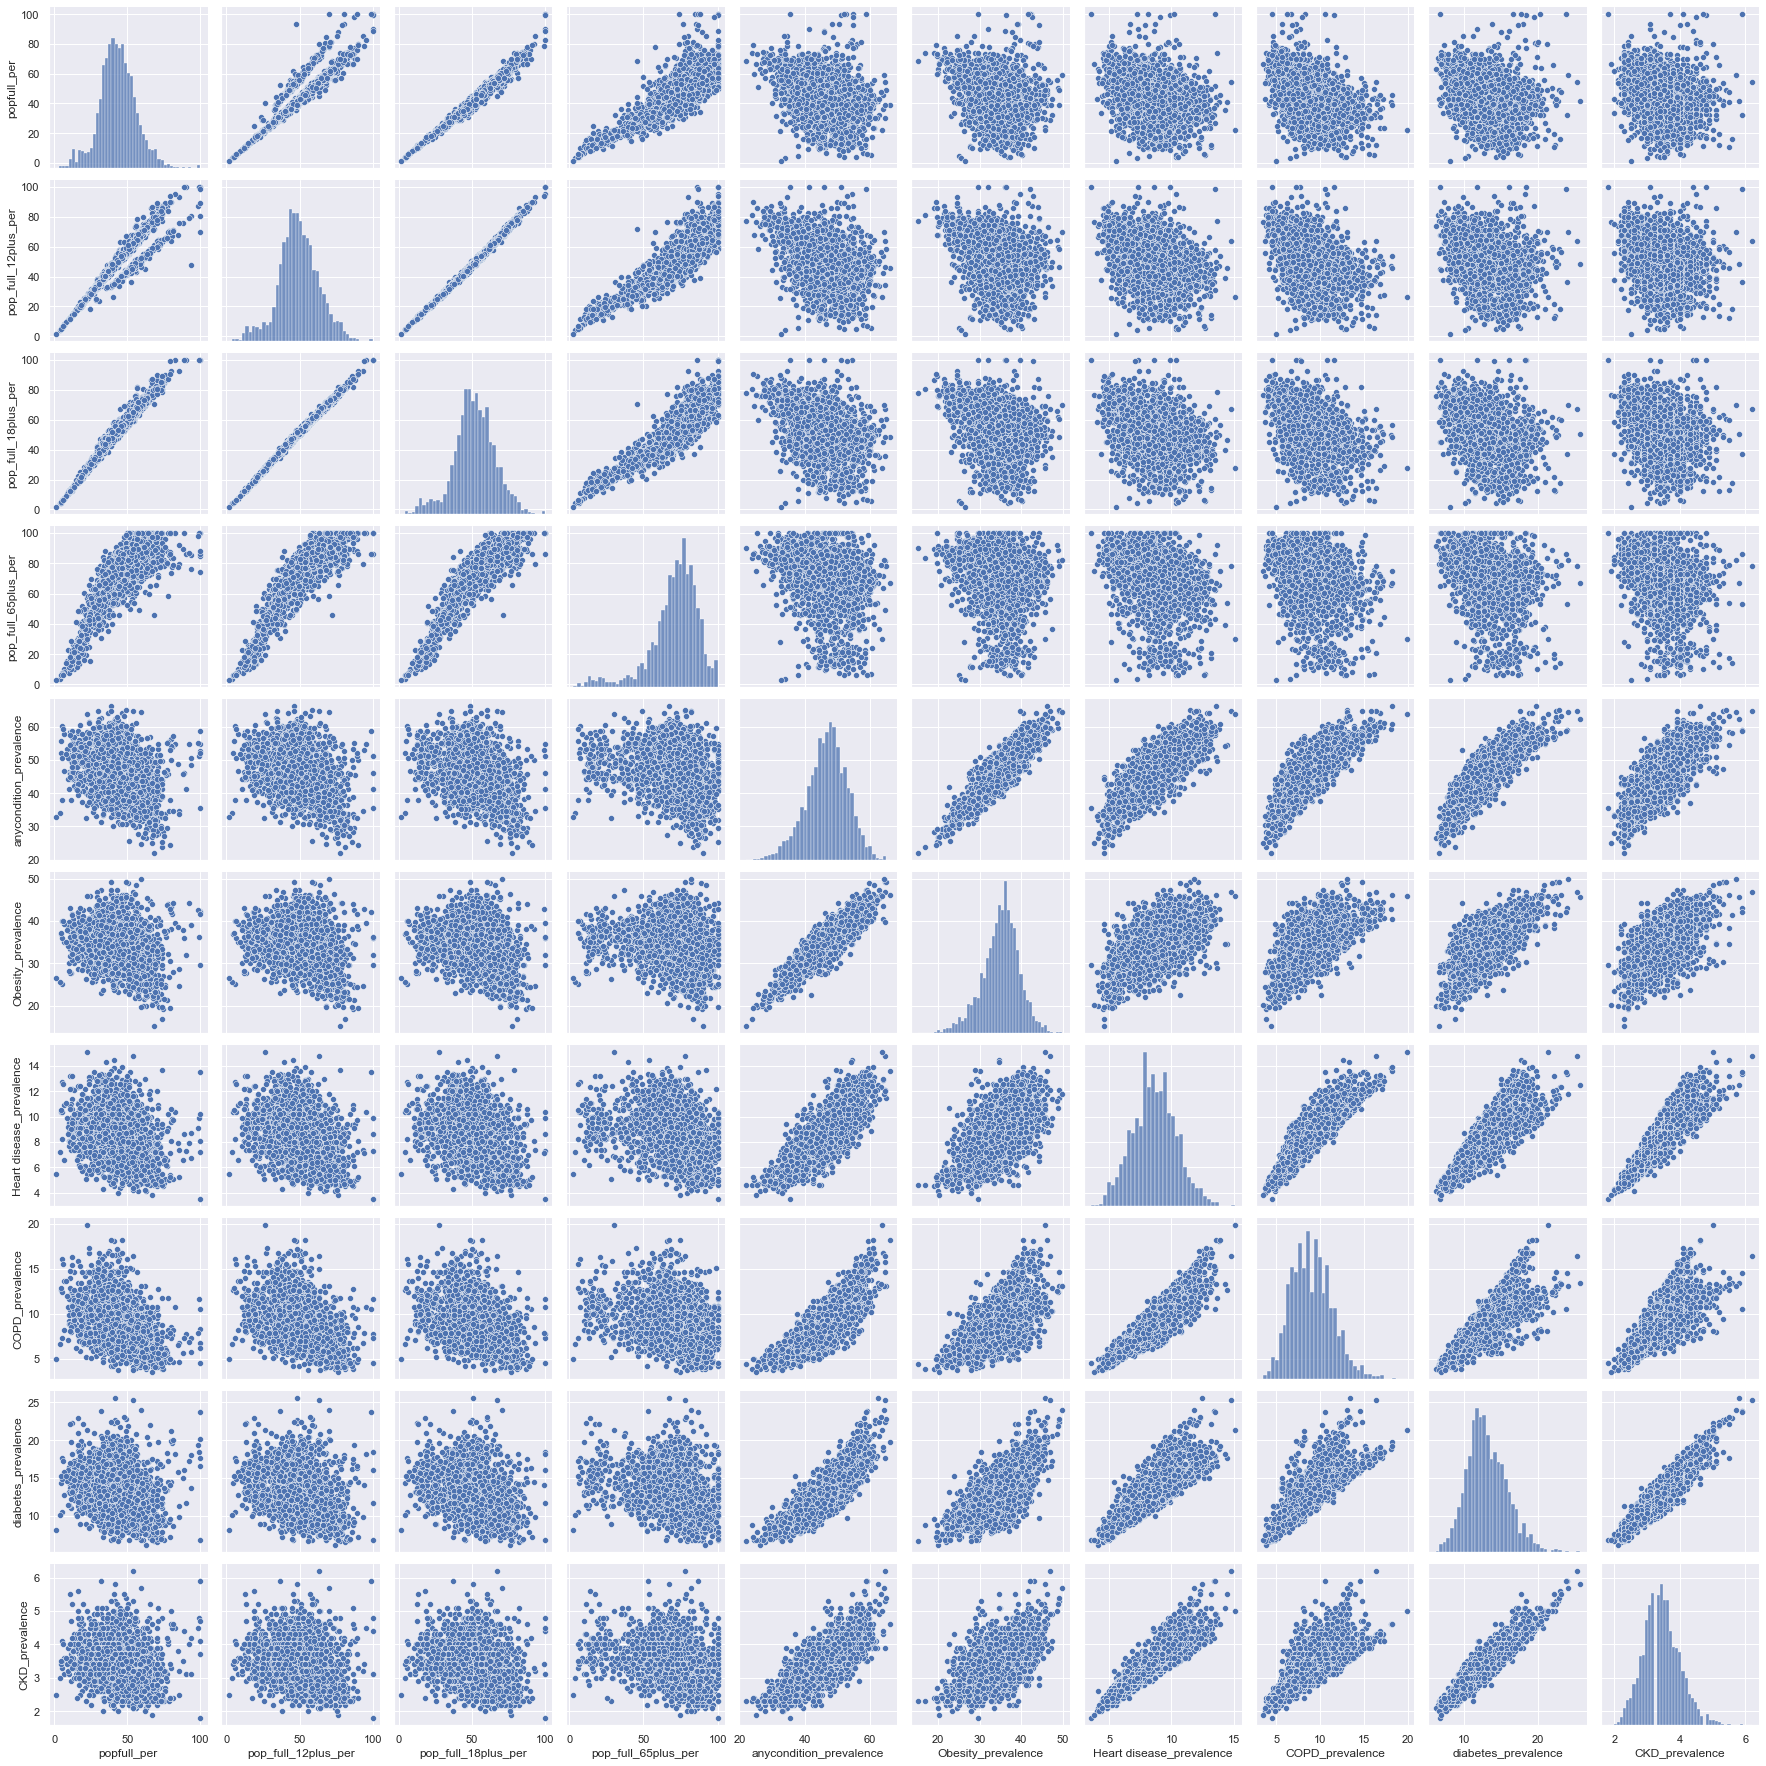

In [16]:
sns.pairplot(vcc[['popfull_per', 'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per','anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']])

In [20]:
vcc[['popfull_per', 'pop_full_12plus_per', 'pop_full_18plus_per', 'pop_full_65plus_per','anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence', 'Urban_rural_code']].corr()

popfull_per  pop_full_12plus_per  \
popfull_per                  1.000000             0.940795   
pop_full_12plus_per          0.940795             1.000000   
pop_full_18plus_per          0.989014             0.997870   
pop_full_65plus_per          0.802070             0.867045   
anycondition_prevalence     -0.336287            -0.395095   
Obesity_prevalence          -0.251758            -0.304556   
Heart disease_prevalence    -0.335444            -0.380874   
COPD_prevalence             -0.413246            -0.418286   
diabetes_prevalence         -0.261020            -0.334344   
CKD_prevalence              -0.247777            -0.301630   
Urban_rural_code            -0.268470            -0.294669   

                          pop_full_18plus_per  pop_full_65plus_per  \
popfull_per                          0.989014             0.802070   
pop_full_12plus_per                  0.997870             0.867045   
pop_full_18plus_per                  1.000000             0.888569   
pop_full_65plus_per                  0.888569             1.000000   
anycondition_prevalence             -0.386864            -0.288277   
Obesity_prevalence                  -0.298149            -0.168743   
Heart disease_prevalence            -0.374507            -0.344943   
COPD_prevalence                     -0.408388            -0.335317   
diabetes_prevalence                 -0.358074            -0.349935   
CKD_prevalence                      -0.317821            -0.336113   
Urban_rural_code                    -0.269497            -0.217551   

                          anycondition_prevalence  Obesity_prevalence  \
popfull_per                             -0.336287           -0.251758   
pop_full_12plus_per                     -0.395095           -0.304556   
pop_full_18plus_per                     -0.386864           -0.298149   
pop_full_65plus_per                     -0.288277           -0.168743   
anycondition_prevalence                  1.000000            0.894482   
Obesity_prevalence                       0.894482            1.000000   
Heart disease_prevalence                 0.784324            0.560068   
COPD_prevalence                          0.810199            0.588048   
diabetes_prevalence                      0.850577            0.700887   
CKD_prevalence                           0.736315            0.558287   
Urban_rural_code                         0.341530            0.285250   

                          Heart disease_prevalence  COPD_prevalence  \
popfull_per                              -0.335444        -0.413246   
pop_full_12plus_per                      -0.380874        -0.418286   
pop_full_18plus_per                      -0.374507        -0.408388   
pop_full_65plus_per                      -0.344943        -0.335317   
anycondition_prevalence                   0.784324         0.810199   
Obesity_prevalence                        0.560068         0.588048   
Heart disease_prevalence                  1.000000         0.887286   
COPD_prevalence                           0.887286         1.000000   
diabetes_prevalence                       0.830909         0.789291   
CKD_prevalence                            0.893109         0.738499   
Urban_rural_code                          0.517444         0.354691   

                          diabetes_prevalence  CKD_prevalence  \
popfull_per                         -0.261020       -0.247777   
pop_full_12plus_per                 -0.334344       -0.301630   
pop_full_18plus_per                 -0.358074       -0.317821   
pop_full_65plus_per                 -0.349935       -0.336113   
anycondition_prevalence              0.850577        0.736315   
Obesity_prevalence                   0.700887        0.558287   
Heart disease_prevalence             0.830909        0.893109   
COPD_prevalence                      0.789291        0.738499   
diabetes_prevalence                  1.000000        0.919148   
CKD_prevalence                       0.919148        1.00000

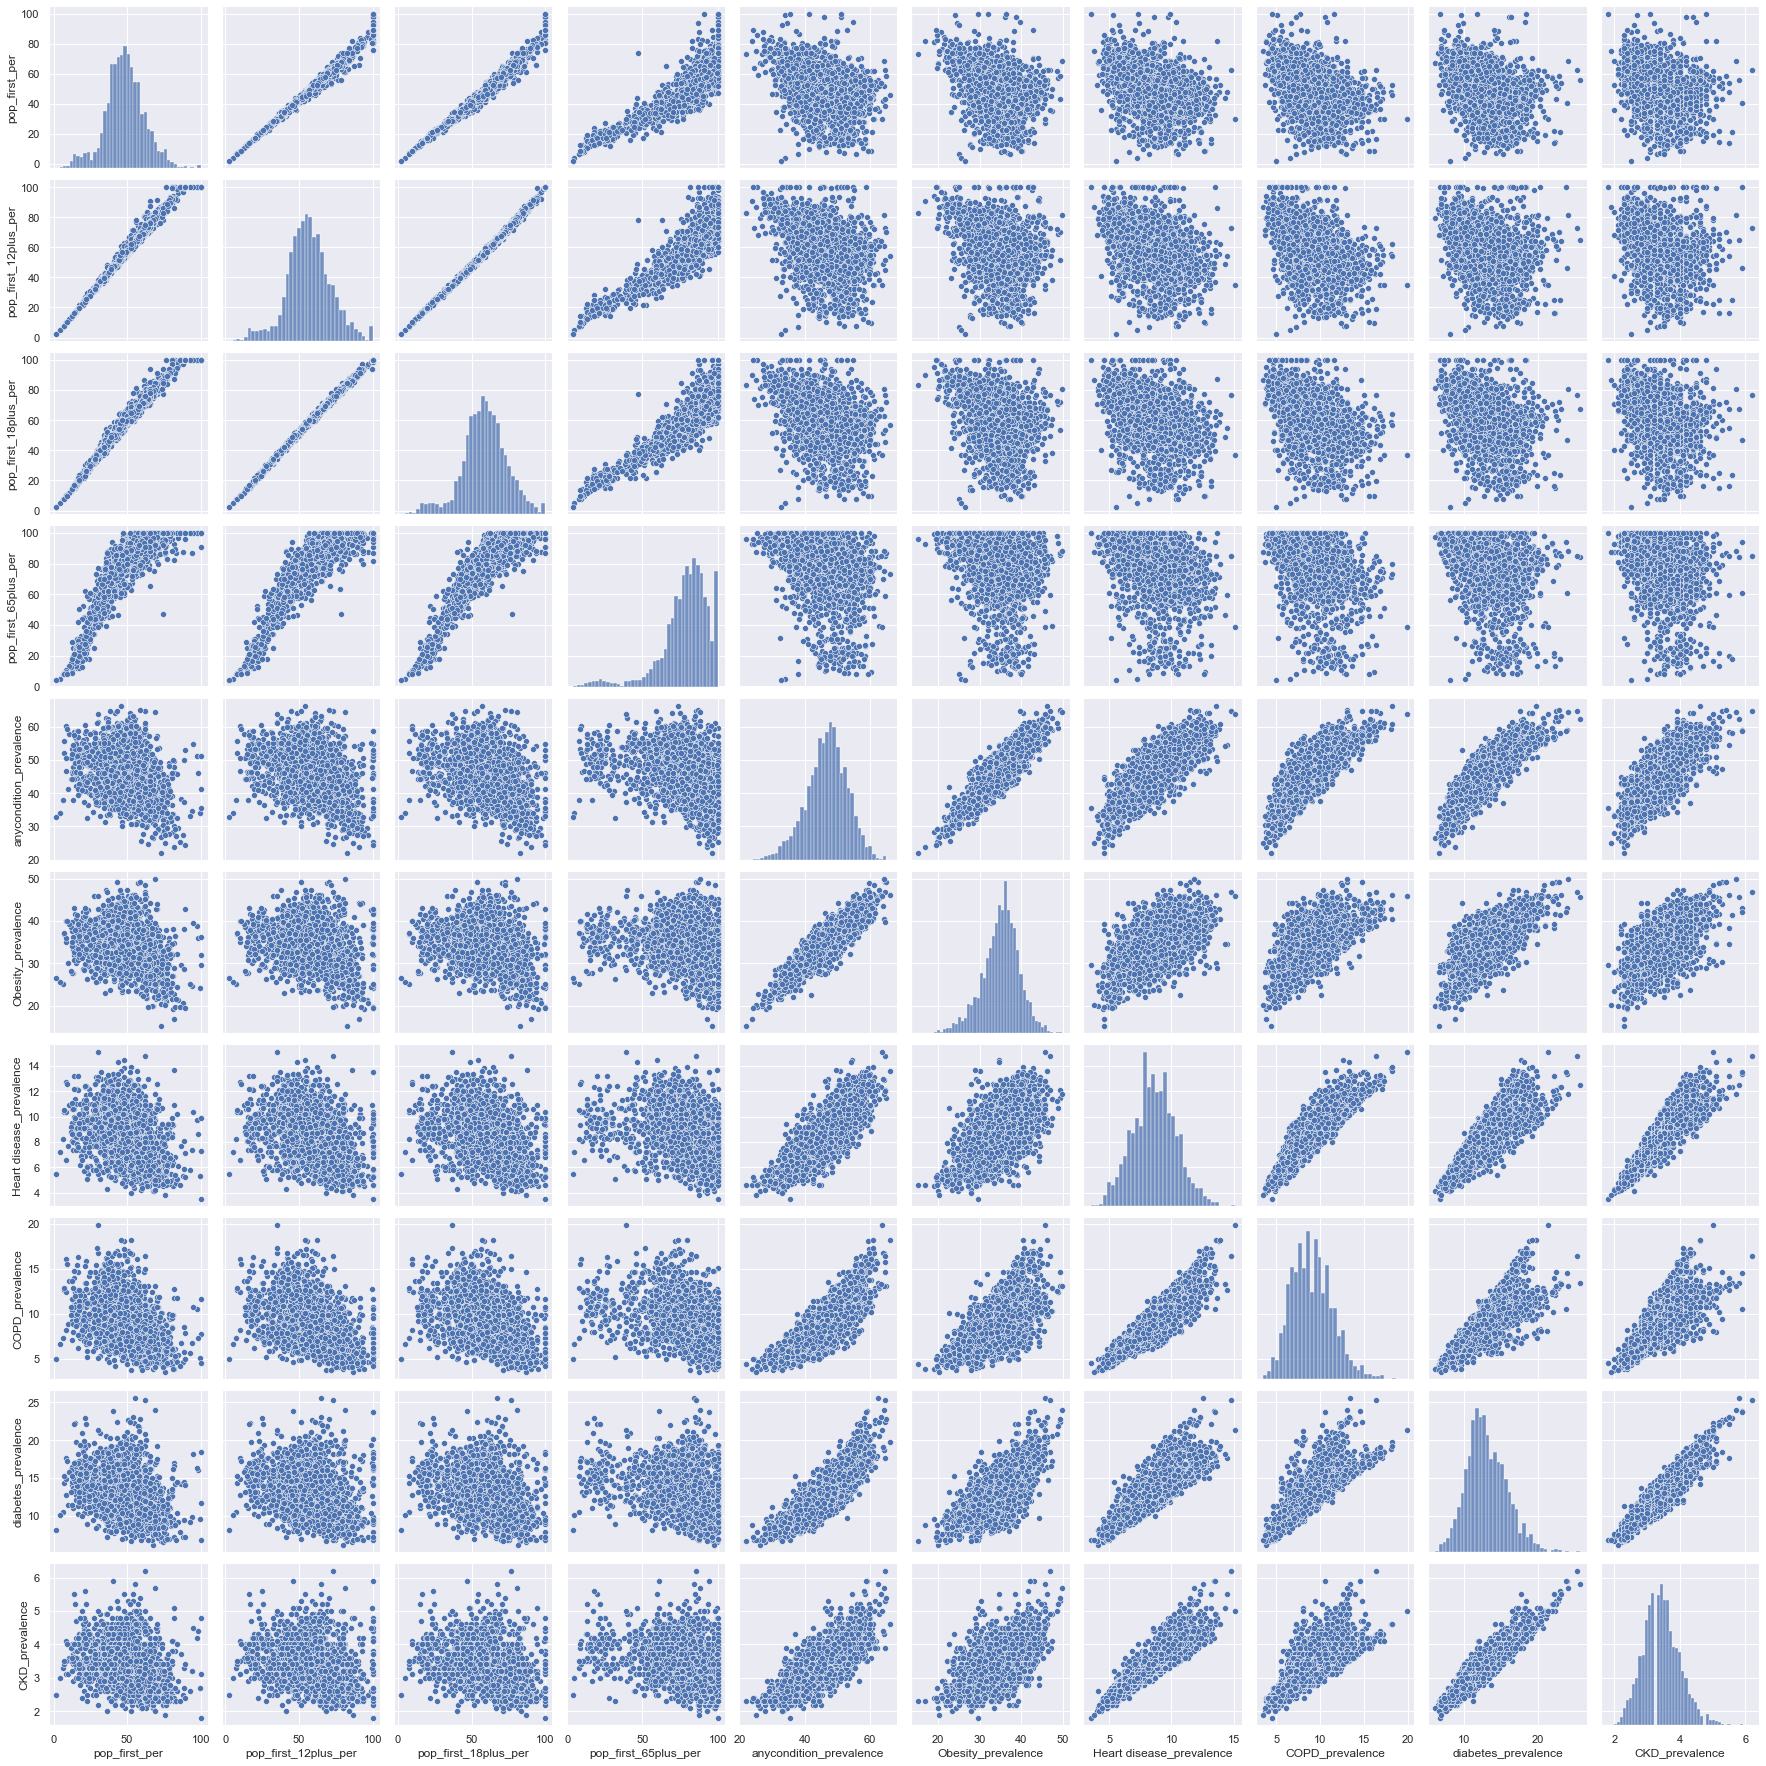

In [17]:
sns.pairplot(vcc[['pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per','anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']])

In [25]:
#difference between fully and partially vaccinated population per county in relation to prevalence of underlying medical conditions. 

y=vcc['popfull_per']-vcc['pop_first_per']
print(y.min()-y.max())
print(y.mean())

-49.3
-5.699634235552302


In [16]:
vcc['pop_full-first']=vcc['popfull_per']-vcc['pop_first_per']

In [21]:
vcc[['pop_full-first','pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per','anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence', 'Urban_rural_code']].corr()

pop_full-first  pop_first_per  pop_first_12plus_per  \
pop_full-first                  1.000000      -0.464238             -0.463302   
pop_first_per                  -0.464238       1.000000              0.992813   
pop_first_12plus_per           -0.463302       0.992813              1.000000   
pop_first_18plus_per           -0.457262       0.987524              0.997737   
pop_first_65plus_per           -0.375322       0.850297              0.862403   
anycondition_prevalence         0.005143      -0.387702             -0.380349   
Obesity_prevalence              0.047772      -0.327616             -0.295334   
Heart disease_prevalence        0.068595      -0.360067             -0.385348   
COPD_prevalence                 0.043117      -0.404921             -0.432111   
diabetes_prevalence            -0.048286      -0.336517             -0.312838   
CKD_prevalence                 -0.011664      -0.291997             -0.286347   
Urban_rural_code                0.186119      -0.292738             -0.308365   

                          pop_first_18plus_per  pop_first_65plus_per  \
pop_full-first                       -0.457262             -0.375322   
pop_first_per                         0.987524              0.850297   
pop_first_12plus_per                  0.997737              0.862403   
pop_first_18plus_per                  1.000000              0.886501   
pop_first_65plus_per                  0.886501              1.000000   
anycondition_prevalence              -0.376030             -0.302595   
Obesity_prevalence                   -0.297154             -0.191061   
Heart disease_prevalence             -0.378500             -0.366259   
COPD_prevalence                      -0.420698             -0.377704   
diabetes_prevalence                  -0.343038             -0.359576   
CKD_prevalence                       -0.305197             -0.334125   
Urban_rural_code                     -0.285129             -0.230283   

                          anycondition_prevalence  Obesity_prevalence  \
pop_full-first                           0.005143            0.047772   
pop_first_per                           -0.387702           -0.327616   
pop_first_12plus_per                    -0.380349           -0.295334   
pop_first_18plus_per                    -0.376030           -0.297154   
pop_first_65plus_per                    -0.302595           -0.191061   
anycondition_prevalence                  1.000000            0.894482   
Obesity_prevalence                       0.894482            1.000000   
Heart disease_prevalence                 0.784324            0.560068   
COPD_prevalence                          0.810199            0.588048   
diabetes_prevalence                      0.850577            0.700887   
CKD_prevalence                           0.736315            0.558287   
Urban_rural_code                         0.341530            0.285250   

                          Heart disease_prevalence  COPD_prevalence  \
pop_full-first                            0.068595         0.043117   
pop_first_per                            -0.360067        -0.404921   
pop_first_12plus_per                     -0.385348        -0.432111   
pop_first_18plus_per                     -0.378500        -0.420698   
pop_first_65plus_per                     -0.366259        -0.377704   
anycondition_prevalence                   0.784324         0.810199   
Obesity_prevalence                        0.560068         0.588048   
Heart disease_prevalence                  1.000000         0.887286   
COPD_prevalence                           0.887286         1.000000   
diabetes_prevalence                       0.830909         0.789291   
CKD_prevalence                            0.893109         0.738499   
Urban_rural_code                          0.517444         0.354691   

                          diabetes_prevalence  CKD_prevalence  \
pop_full-first                      -0.048286       -0.011664   
pop_first_per                  

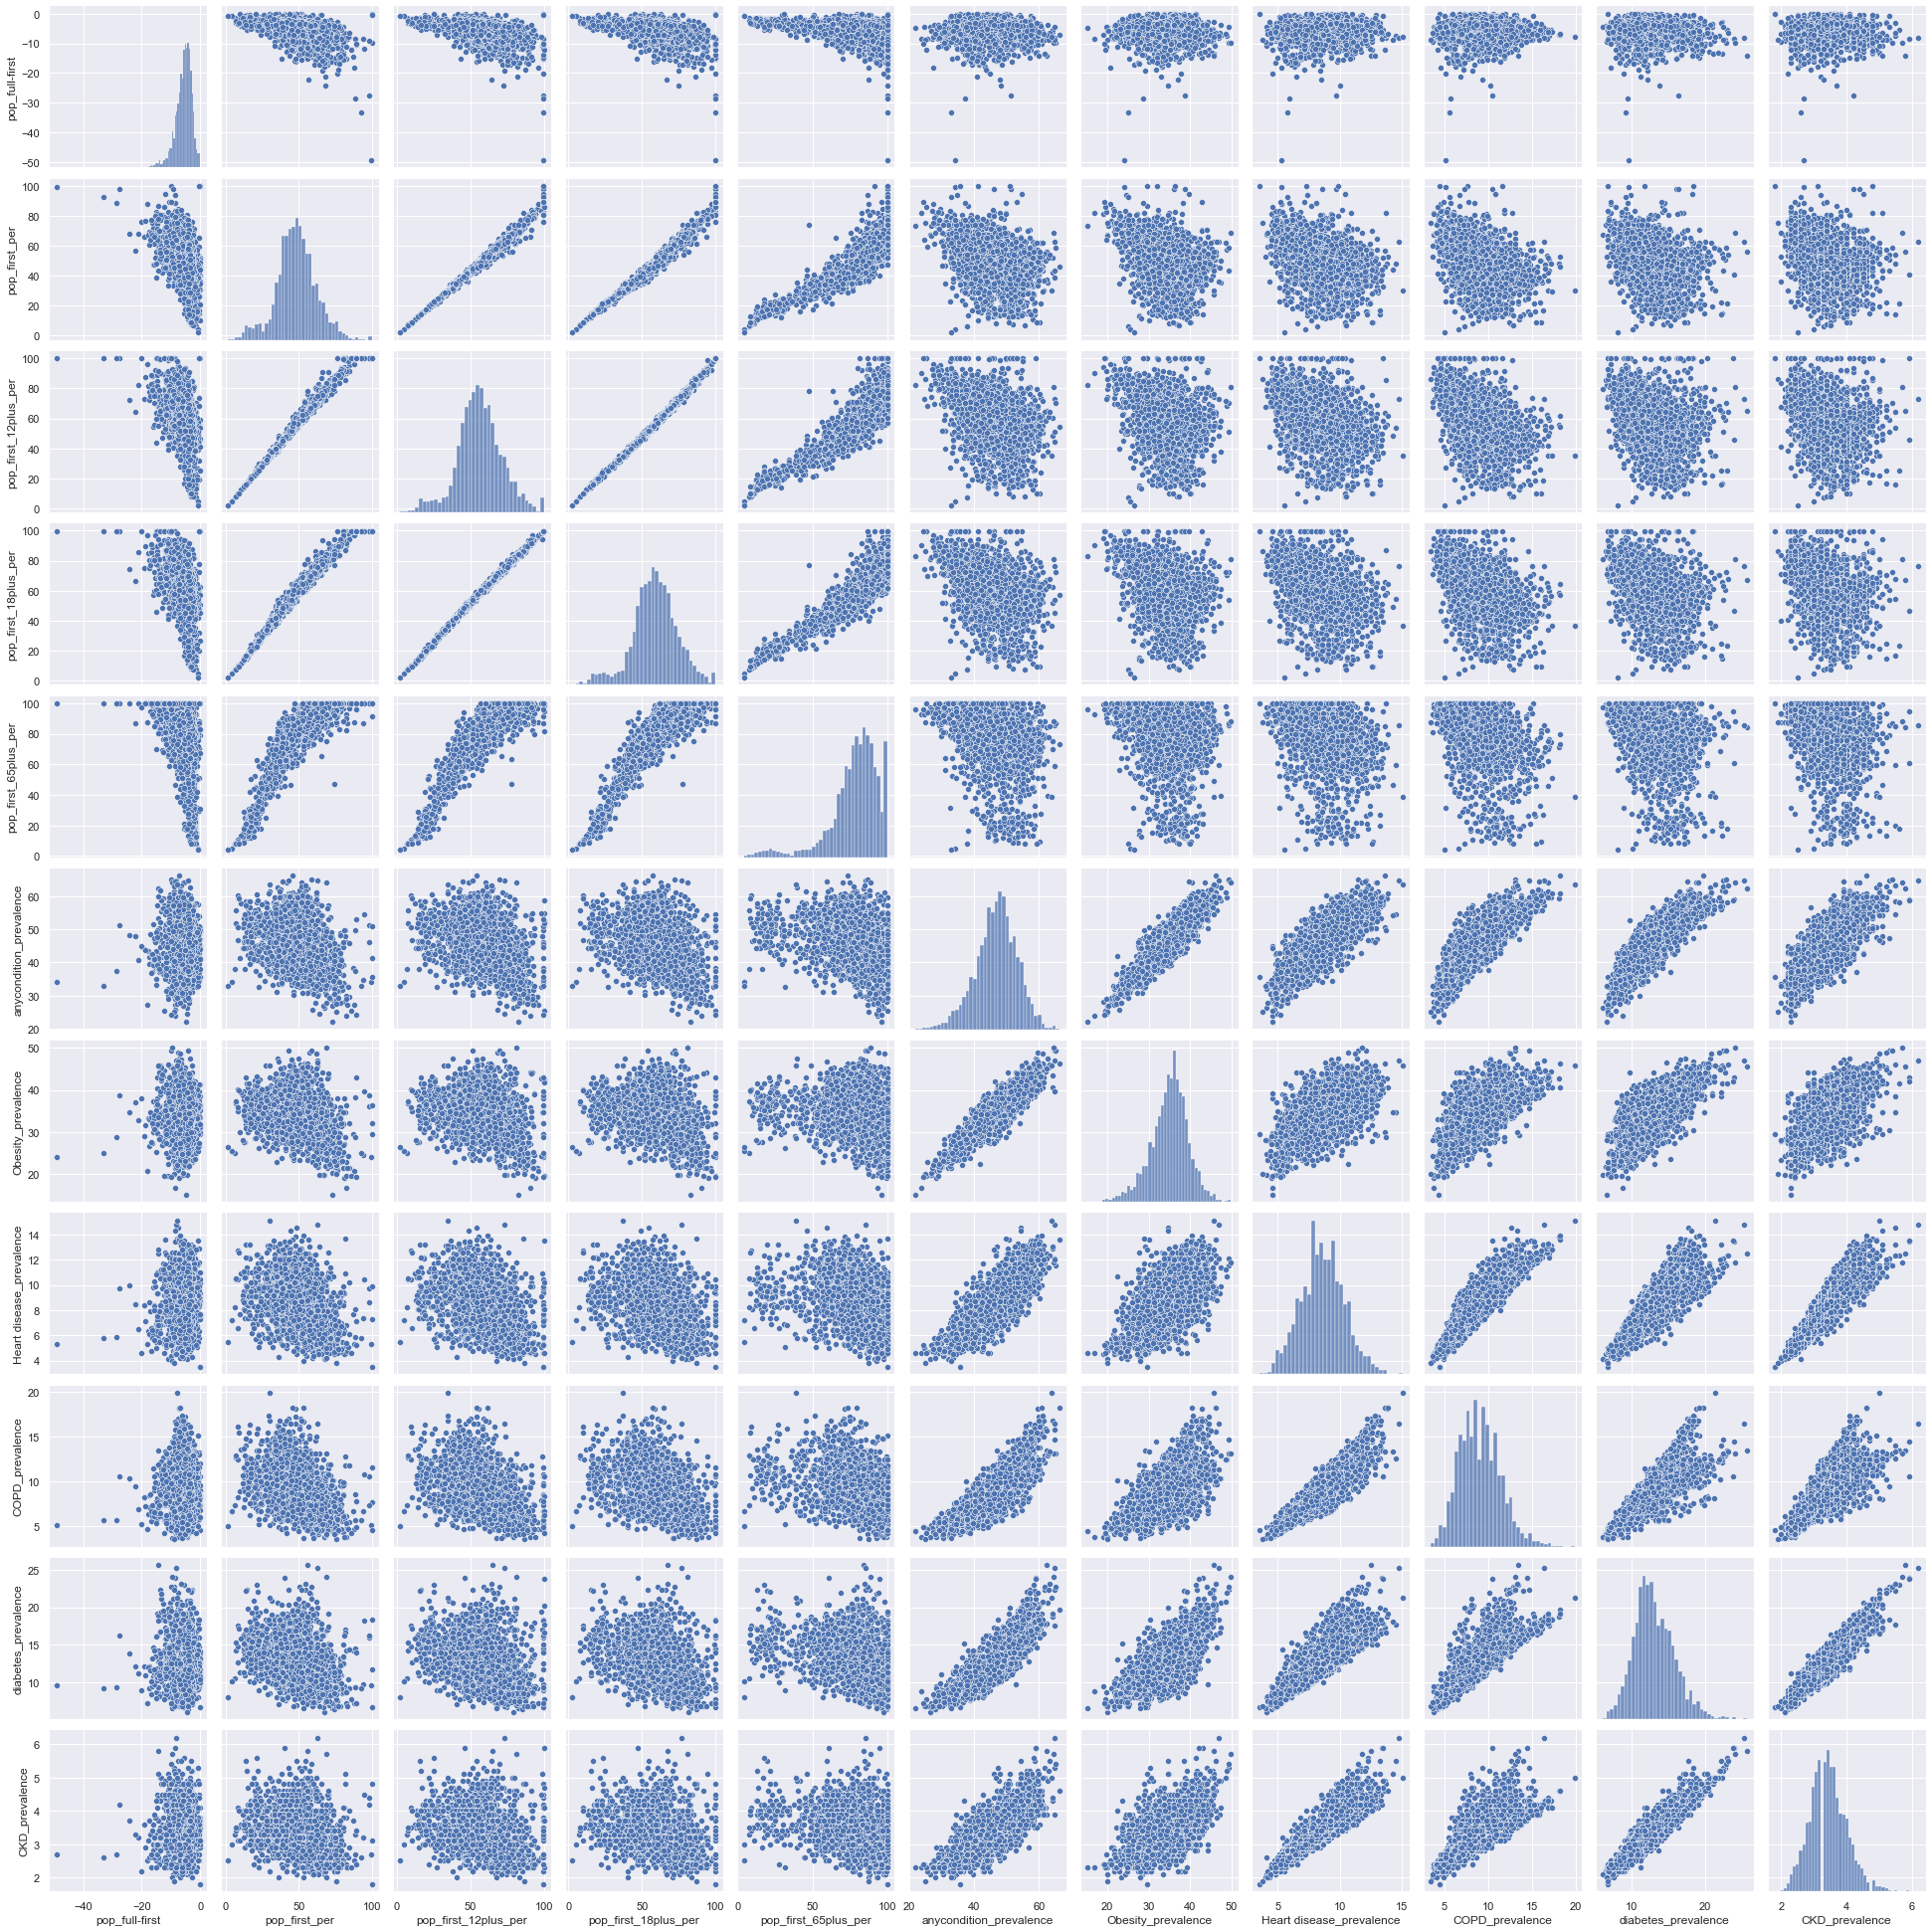

In [30]:
sns.pairplot(vcc[['pop_full-first','pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per','anycondition_prevalence', 'Obesity_prevalence', 'Heart disease_prevalence', 'COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']])

In [ ]:
## nb value is underestimated bc it is free, ,so particularly in US where no healthcare is free, has that contributed to hesitancy .
## any measure of barriers to acess? (hopefully these were all removed, but realistically no)


In [31]:
vcc[['pop_full-first','pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per','anycondition_prevalence', 'Urban_rural_code']].corr()

pop_full-first  pop_first_per  pop_first_12plus_per  \
pop_full-first                 1.000000      -0.464238             -0.463302   
pop_first_per                 -0.464238       1.000000              0.992813   
pop_first_12plus_per          -0.463302       0.992813              1.000000   
pop_first_18plus_per          -0.457262       0.987524              0.997737   
pop_first_65plus_per          -0.375322       0.850297              0.862403   
anycondition_prevalence        0.005143      -0.387702             -0.380349   
Urban_rural_code               0.186119      -0.292738             -0.308365   

                         pop_first_18plus_per  pop_first_65plus_per  \
pop_full-first                      -0.457262             -0.375322   
pop_first_per                        0.987524              0.850297   
pop_first_12plus_per                 0.997737              0.862403   
pop_first_18plus_per                 1.000000              0.886501   
pop_first_65plus_per                 0.886501              1.000000   
anycondition_prevalence             -0.376030             -0.302595   
Urban_rural_code                    -0.285129             -0.230283   

                         anycondition_prevalence  Urban_rural_code  
pop_full-first                          0.005143          0.186119  
pop_first_per                          -0.387702         -0.292738  
pop_first_12plus_per                   -0.380349         -0.308365  
pop_first_18plus_per                   -0.376030         -0.285129  
pop_first_65plus_per                   -0.302595         -0.230283  
anycondition_prevalence                 1.000000          0.341530  
Urban_rural_code                        0.341530          1.000000

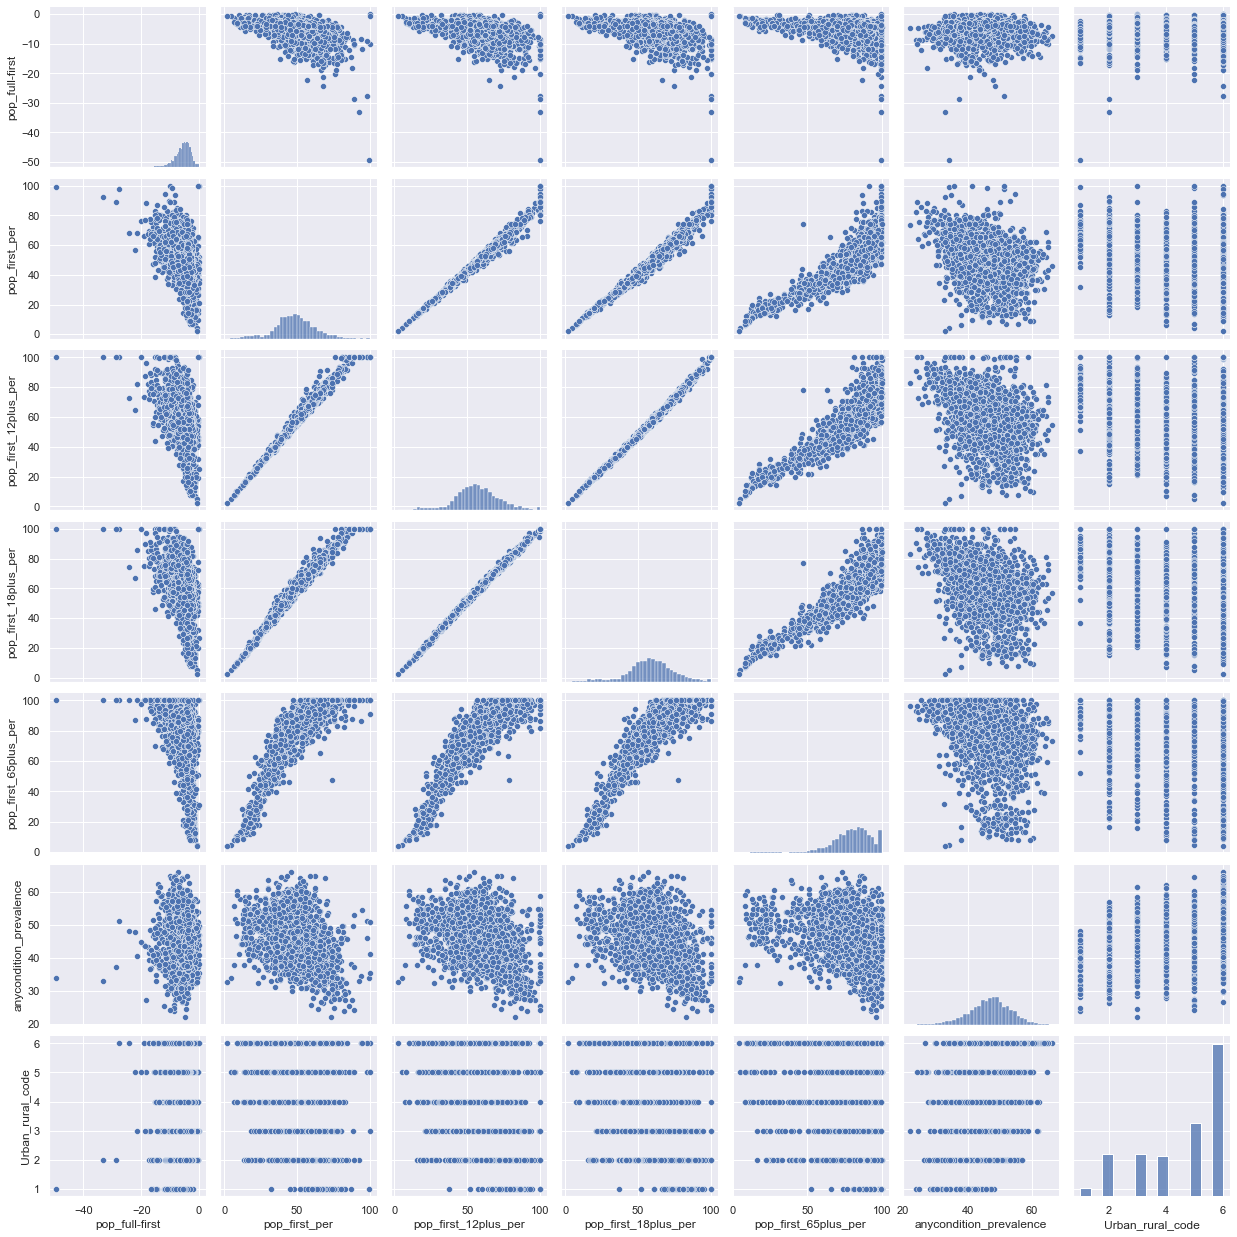

In [32]:
sns.pairplot(vcc[['pop_full-first','pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per','anycondition_prevalence', 'Urban_rural_code']])

In [34]:
vcc[['logPopDensity','Urban_rural_code']].corr()

logPopDensity  Urban_rural_code
logPopDensity          1.000000         -0.688355
Urban_rural_code      -0.688355          1.000000

In [17]:
vcc[['pop_full-first','pop_first_per', 'pop_first_12plus_per', 'pop_first_18plus_per', 'pop_first_65plus_per','anycondition_prevalence', 'Urban_rural_code']].corr()

pop_full-first  pop_first_per  pop_first_12plus_per  \
pop_full-first                 1.000000      -0.464238             -0.463302   
pop_first_per                 -0.464238       1.000000              0.992813   
pop_first_12plus_per          -0.463302       0.992813              1.000000   
pop_first_18plus_per          -0.457262       0.987524              0.997737   
pop_first_65plus_per          -0.375322       0.850297              0.862403   
anycondition_prevalence        0.005143      -0.387702             -0.380349   
Urban_rural_code               0.186119      -0.292738             -0.308365   

                         pop_first_18plus_per  pop_first_65plus_per  \
pop_full-first                      -0.457262             -0.375322   
pop_first_per                        0.987524              0.850297   
pop_first_12plus_per                 0.997737              0.862403   
pop_first_18plus_per                 1.000000              0.886501   
pop_first_65plus_per                 0.886501              1.000000   
anycondition_prevalence             -0.376030             -0.302595   
Urban_rural_code                    -0.285129             -0.230283   

                         anycondition_prevalence  Urban_rural_code  
pop_full-first                          0.005143          0.186119  
pop_first_per                          -0.387702         -0.292738  
pop_first_12plus_per                   -0.380349         -0.308365  
pop_first_18plus_per                   -0.376030         -0.285129  
pop_first_65plus_per                   -0.302595         -0.230283  
anycondition_prevalence                 1.000000          0.341530  
Urban_rural_code                        0.341530          1.000000

In [19]:
vcc['Urban_rural_code'].describe()

count    3137.000000
mean        4.636914
std         1.511166
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max         6.000000
Name: Urban_rural_code, dtype: float64